# 分析合併公司:
- 2016 CTBC Life 與 Taiwan Life 合併成 Taiwan Life

In [2]:
import fiscal_analyzing_utils as utils

In c:\Users\user\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In c:\Users\user\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In c:\Users\user\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In c:\Users\user\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In c:\Users\user\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle

In [3]:
# %%
from matplotlib.axes import Axes
import os
import pandas as pd
import numpy as np
import constant as const
from load_data import denoise_nonpositive, LIFE_DUMMY141516, LIFE181920
from itertools import combinations
import matplotlib.pyplot as plt
from textwrap import wrap
CMAP = plt.get_cmap('jet')
import seaborn as sns
sns.set_theme(style="darkgrid")

In [17]:
ctbc_dmus=[
        "CTBC Life 14", "CTBC Life 15", 'Taiwan Life 16',
        # "CTBC Life 15", "DUMMY Taiwan 16", 
        # 'Taiwan Life 14', 'Taiwan Life 15', 'Taiwan Life 16', 
        # 'Taiwan Life 15', "DUMMY Taiwan 16", 
            ]
ctbc = utils.get_analyze_df(
    dmu_ks=ctbc_dmus, df=denoise_nonpositive(LIFE_DUMMY141516.loc[ctbc_dmus]), year=14, remain_last=True)
utils.round_analyze_df(ctbc, round_to=4)#.to_excel("14-16 all_dmu analysis.xlsx")

Output Progress Direction
Marginal Profit Max Direction


,Insurance Expenses,Operation Expenses,Underwriting Profit,Investment Profit,Scale,Profit,Output Progress Direction,Marginal Profit Max Direction,Marginal Profit Consistency,Efficiency,Efficiency Change
CTBC Life 14,10.8484,2.3518,28.5429,11.8970,13.2001,40.4399,"[-0.4455, 0.5545]","[0.495, 0.005]",-0.6184,1.0242,0.9987
CTBC Life 15,10.6320,2.4684,25.4867,15.7016,13.1005,41.1883,"[-0.4743, 0.5257]","[0.005, 0.495]",0.7356,1.0255,0.9753
Taiwan Life 16,17.6594,4.9022,0.0000,43.9483,22.5615,43.9483,"[nan, nan]","[0.495, 0.005]",NaN,1.0514,NaN


In [20]:
ctbc_dummy_dmus=[
        "CTBC Life 14",
        "CTBC Life 15", "DUMMY Taiwan 16", 
        # 'Taiwan Life 14', 'Taiwan Life 15', 'Taiwan Life 16', 
        # 'Taiwan Life 15', "DUMMY Taiwan 16", 
            ]
ctbc_dummy = utils.get_analyze_df(
    dmu_ks=ctbc_dmus, df=denoise_nonpositive(LIFE_DUMMY141516.loc[ctbc_dummy_dmus]), year=14, remain_last=True)
utils.round_analyze_df(ctbc_dummy, round_to=4)#.to_excel("14-16 all_dmu analysis.xlsx")

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['Taiwan Life 16'], dtype='object'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

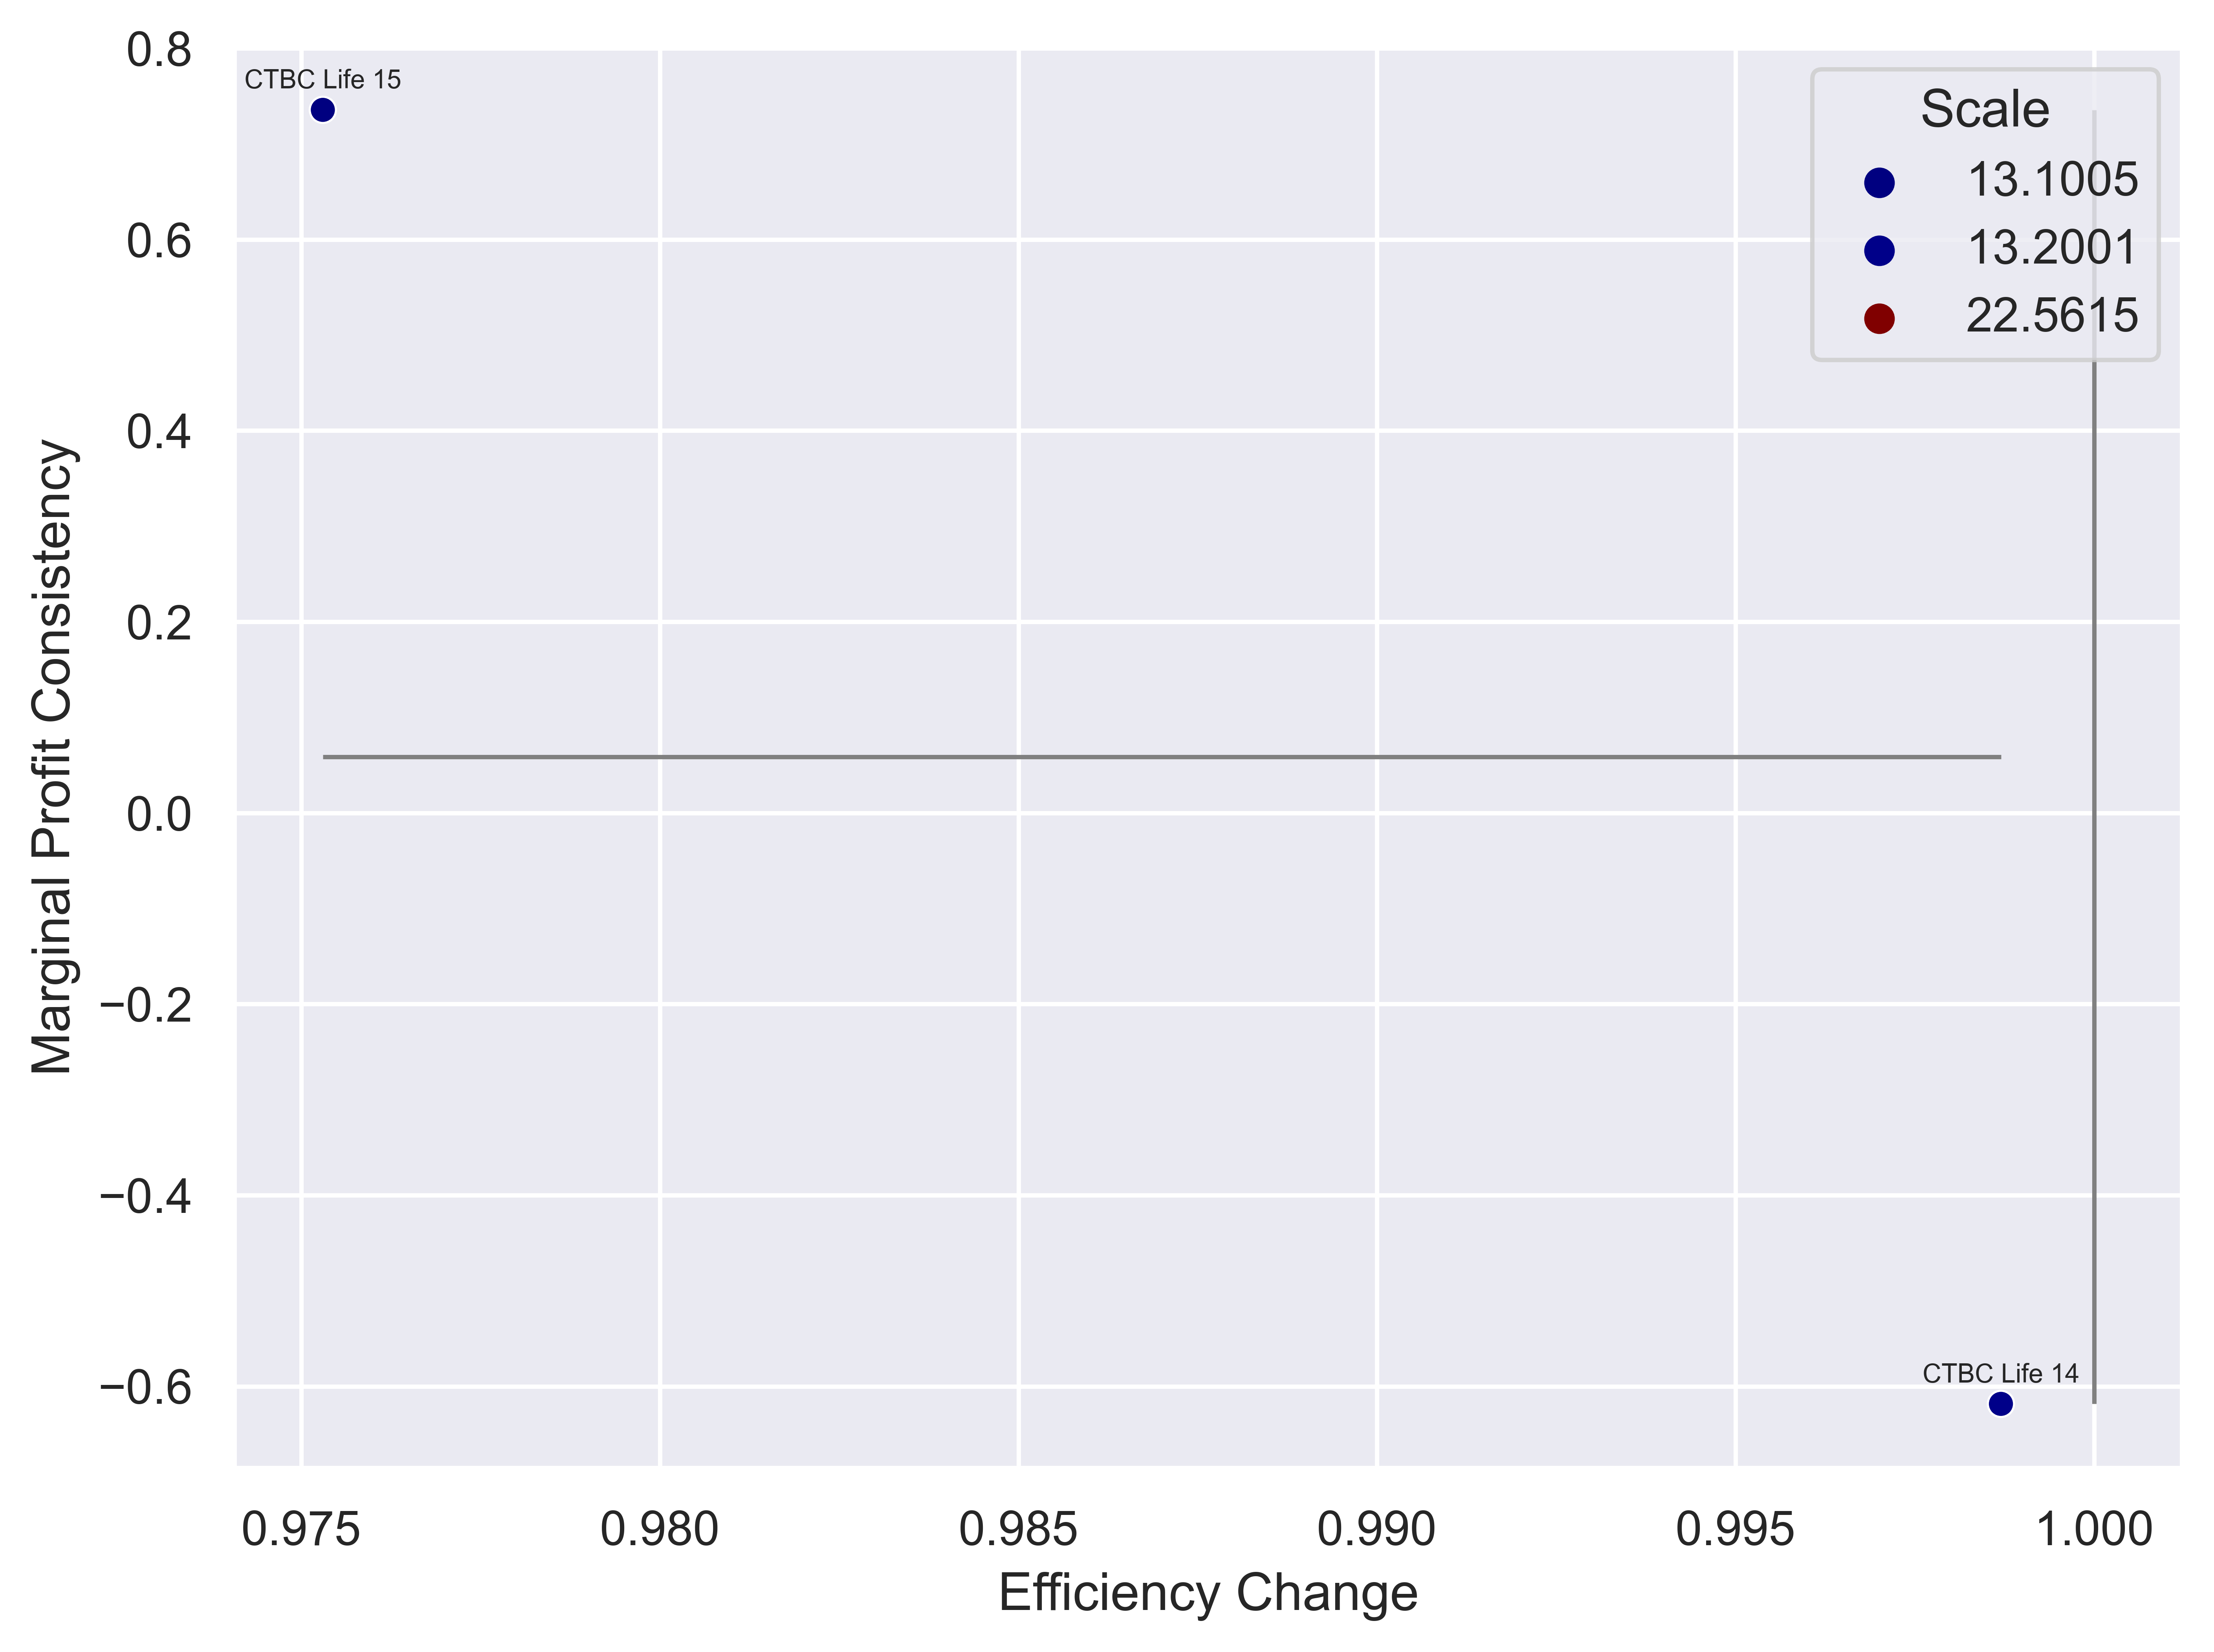

In [18]:
for col in [const.SCALE,]:
    for y_col in [const.CONSISTENCY,]:
        fig, ax = plt.subplots(figsize=(8, 6), dpi=800)
        utils.analyze_plot(ax, ctbc, y_col=y_col, according_col=col, fontsize=6)
        # stitle = f"2014-2016 all DMUs {y_col} with {col}"
        # ax.set_title(stitle)
        # plt.savefig(f"{stitle}.png")
        plt.show()